### 1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Importing the training data, labels data and the test data files

In [2]:
trn_data = pd.read_csv('training_data.csv',header=None)
trn_data_labels = pd.read_csv('training_labels.csv', header=None)

In [3]:
test_data = pd.read_csv('test_data.csv', header=None)

In [5]:
trn_data.shape

(20104, 13627)

In [6]:
test_data.shape

(2233, 13627)

In [63]:
total_data.shape

(22337, 13627)

In [8]:
trn_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,13617,13618,13619,13620,13621,13622,13623,13624,13625,13626
20099,sk.freemap.locus.addon.routePlanner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20100,com.sybase.atb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20101,com.moviesnow.hollywood,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20102,com.tajtech2013.tamillivefreetv,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20103,com.otakumode.otakucamera,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
test_data.tail()

,0,1,2,3,4,5,6,7,8,9,...,13617,13618,13619,13620,13621,13622,13623,13624,13625,13626
2228,sg.com.squarefoot,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0
2229,kr.co.yam3.searchmenu,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0
2230,com.daeha.android.app.repeat_ja_ko,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0
2231,com.sec.android.allShareControl,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0
2232,com.mobileriders.butt.sculpting.exercises,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0.0,0,0.0,0.0,0


### 3. Data Pre-processing

Row-wise concatenation of the training data with the test data to get a single dataset for SVD calculation. This is a required step as if we perform SVD only on test data at a later point in time then it might not result in having the same number of dimensions.

In [4]:
total_data = pd.concat([trn_data,test_data],axis=0).reset_index(drop=True)

Uncomment and read the svd file if you have already performed dimensionality reduction

In [ ]:
#redux_total_data = pd.read_csv('redux_total_data.csv', sep='\t')

#### 3.1 Dimensionality Reduction using TruncatedSVD

Performing Truncated SVD on the training data to reduce the number of dimensions

In [10]:
ncomps = 6000
svd = TruncatedSVD(n_components=ncomps)
svd_fit = svd.fit(total_data.iloc[:,1:])

In [11]:
redux_total_data = svd.fit_transform(total_data.iloc[:,1:])

Check for the explained variance in the reduced dimensional space

In [17]:
print(pd.Series(svd_fit.explained_variance_ratio_.cumsum()[-1]))

0    0.970893
dtype: float64


In [15]:
redux_total_data = pd.DataFrame(redux_total_data)

In [28]:
redux_total_data.shape

(22337, 6000)

Write the SVD output to disk as a backup in case the kernel dies

In [14]:
#redux_total_data.to_csv('redux_total_data.csv', sep='\t')

Now that the dimensionality reduction process is complete, split total data back to train and test data as reduced dimensional data sets.

In [31]:
trn_data = pd.concat([total_data.iloc[:trn_data.shape[0],0],redux_total_data.iloc[:trn_data.shape[0],:]], axis=1)

In [42]:
trn_data.tail()

,0,0,1,2,3,4,5,6,7,8,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
20099,sk.freemap.locus.addon.routePlanner,0.421678,0.166858,0.010075,-0.008851,-0.004363,0.003323,-0.018078,-0.009721,0.017196,...,-0.000378,-0.002720,0.003121,0.000014,0.010501,0.000675,0.001834,-0.003278,0.000367,-0.003101
20100,com.sybase.atb,0.056262,-0.084865,-0.017262,-0.043829,-0.016727,-0.006557,-0.018398,-0.035099,0.083216,...,0.002754,0.000439,-0.002211,0.000308,0.004076,-0.003650,0.004183,0.000977,-0.003216,-0.001637
20101,com.moviesnow.hollywood,0.051474,-0.077326,-0.013585,-0.029486,0.001874,-0.015272,0.005544,-0.003553,0.012667,...,0.005093,-0.002933,0.000281,0.000984,0.000488,0.004310,0.003348,-0.003324,-0.010342,-0.004311
20102,com.tajtech2013.tamillivefreetv,0.079451,-0.117832,-0.033261,-0.089735,0.174633,0.049491,0.029616,0.007999,-0.017072,...,0.002699,0.000667,-0.004019,-0.006293,-0.001060,0.003279,-0.000143,0.001345,0.001493,-0.003373
20103,com.otakumode.otakucamera,0.072184,-0.106918,-0.016485,-0.014129,-0.018308,-0.036713,0.010204,-0.016824,0.040510,...,0.001551,0.004172,0.002001,-0.004727,-0.003491,-0.001645,-0.000504,0.001605,0.003519,0.003338


In [66]:
test_data = pd.concat([total_data.iloc[trn_data.shape[0]:,0],redux_total_data.iloc[trn_data.shape[0]:,:]], axis=1)

In [67]:
test_data.head()

,0,0,1,2,3,4,5,6,7,8,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
20104,dalmax.games.turnBasedGames.connect4,0.058408,-0.086312,-0.017966,-0.029914,-0.038966,-0.065679,-0.038958,0.017048,-0.049100,...,0.002854,-0.009623,0.007389,-0.002249,-0.000379,0.002123,0.001447,0.003505,-0.001945,0.000268
20105,com.holfeld.japaneseplusfree,0.057007,-0.087175,-0.010635,-0.019881,-0.013203,-0.018286,-0.008034,-0.014003,0.039149,...,-0.009131,-0.004556,0.004803,-0.006369,0.002166,0.002527,-0.001443,0.005494,0.005949,-0.004347
20106,com.mobileApp.controller,0.233678,0.009336,-0.000122,0.034950,-0.062975,0.098312,-0.006224,-0.004706,0.013357,...,0.001734,0.004621,0.004127,0.000559,-0.000859,-0.003604,-0.002062,-0.000408,0.001912,-0.001012
20107,com.aarontennyson.calorietracker,0.052331,-0.073060,-0.016667,-0.026372,-0.005165,-0.026041,-0.013224,-0.004844,0.007517,...,0.010772,0.002139,0.005273,0.002945,-0.006192,-0.000632,-0.006245,-0.004676,0.004074,0.002726
20108,com.totaldevel.android.todocitas.ads,0.067605,-0.113293,-0.007841,0.008298,-0.086958,0.076894,-0.006913,0.003860,-0.008090,...,-0.004852,0.003321,-0.003494,0.000028,-0.004103,-0.000485,-0.002378,0.004441,0.002159,0.008925


View the training labels data

In [69]:
trn_data_labels.tail()

,0,1
20099,com.cgx.voicedial,Communication
20100,com.approvaltree.android,Finance
20101,com.moviesnow.hollywood,Media and Video
20102,com.tajtech2013.tamillivefreetv,Entertainment
20103,com.agudoApp.salaryApp,Finance


In [70]:
column_names = []
for i in range(trn_data.shape[1]):
    column_names.append('col'+str(i))

In [71]:
trn_data.columns = column_names

In [72]:
trn_data.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col5991,col5992,col5993,col5994,col5995,col5996,col5997,col5998,col5999,col6000
0,com.borderstylo.retrollect,0.045711,-0.070344,-0.016714,-0.021874,-0.004849,-0.021773,-0.008762,-0.005096,0.009018,...,-0.004965,-0.003973,0.000904,-0.010085,-0.004159,-0.008885,0.001383,-0.000266,0.003803,-0.004487
1,com.ogsm.respool,0.030102,-0.039122,-0.008252,-0.026502,0.000199,-0.002079,0.000443,-0.027988,0.069334,...,-0.000249,0.000357,0.000896,-0.000351,0.000849,-0.001016,-0.000689,-0.000213,0.001325,-0.000941
2,com.gasolin.android.avdhelper,0.054472,-0.080717,-0.014056,-0.010761,-0.015222,-0.013689,-0.005491,-0.016274,0.038510,...,0.001798,0.001043,0.005098,0.006899,-0.006183,0.005521,0.005435,-0.000160,-0.000778,0.000254
3,com.droidhermes.birdjump,0.065156,-0.100074,-0.022975,-0.032834,-0.064094,-0.109763,-0.054317,0.054845,-0.147563,...,-0.002974,0.003161,-0.001626,-0.004486,0.000088,-0.003343,-0.000025,-0.005570,-0.006069,0.002930
4,com.robotentertainment.heroacademy,0.051917,-0.079442,-0.017017,-0.026537,-0.024219,-0.047157,-0.021530,0.017584,-0.049163,...,-0.001526,0.003009,-0.001484,-0.000690,0.007416,-0.007259,0.007131,-0.002451,-0.001490,0.003042


In [75]:
column_names = []
for i in range(trn_data_labels.shape[1]):
    column_names.append('col'+str(i))
    
trn_data_labels.columns = column_names

In [76]:
trn_data_labels.head()

,col0,col1
0,com.borderstylo.retrollect,Photography
1,com.ogsm.respool,Social
2,com.gasolin.android.avdhelper,Libraries and Demo
3,com.robotentertainment.heroacademy,Arcade and Action
4,com.home.remedies.tips4skin.hair.style.tips,Health and Fitness


Merge the training data and labels data based on the app name to get a complete dataset with labels associated

In [77]:
trn_data_with_labels = pd.merge(trn_data, trn_data_labels, on='col0')

In [78]:
trn_data_with_labels.head()

,col0,col1_x,col2,col3,col4,col5,col6,col7,col8,col9,...,col5992,col5993,col5994,col5995,col5996,col5997,col5998,col5999,col6000,col1_y
0,com.borderstylo.retrollect,0.045711,-0.070344,-0.016714,-0.021874,-0.004849,-0.021773,-0.008762,-0.005096,0.009018,...,-0.003973,0.000904,-0.010085,-0.004159,-0.008885,0.001383,-0.000266,0.003803,-0.004487,Photography
1,com.ogsm.respool,0.030102,-0.039122,-0.008252,-0.026502,0.000199,-0.002079,0.000443,-0.027988,0.069334,...,0.000357,0.000896,-0.000351,0.000849,-0.001016,-0.000689,-0.000213,0.001325,-0.000941,Social
2,com.gasolin.android.avdhelper,0.054472,-0.080717,-0.014056,-0.010761,-0.015222,-0.013689,-0.005491,-0.016274,0.038510,...,0.001043,0.005098,0.006899,-0.006183,0.005521,0.005435,-0.000160,-0.000778,0.000254,Libraries and Demo
3,com.droidhermes.birdjump,0.065156,-0.100074,-0.022975,-0.032834,-0.064094,-0.109763,-0.054317,0.054845,-0.147563,...,0.003161,-0.001626,-0.004486,0.000088,-0.003343,-0.000025,-0.005570,-0.006069,0.002930,Brain and Puzzle
4,com.robotentertainment.heroacademy,0.051917,-0.079442,-0.017017,-0.026537,-0.024219,-0.047157,-0.021530,0.017584,-0.049163,...,0.003009,-0.001484,-0.000690,0.007416,-0.007259,0.007131,-0.002451,-0.001490,0.003042,Arcade and Action


Remove the app names from the training data set

In [79]:
trn_data_with_labels = trn_data_with_labels.iloc[:,1:]

In [80]:
trn_data_with_labels.head()

,col1_x,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col5992,col5993,col5994,col5995,col5996,col5997,col5998,col5999,col6000,col1_y
0,0.045711,-0.070344,-0.016714,-0.021874,-0.004849,-0.021773,-0.008762,-0.005096,0.009018,-0.020370,...,-0.003973,0.000904,-0.010085,-0.004159,-0.008885,0.001383,-0.000266,0.003803,-0.004487,Photography
1,0.030102,-0.039122,-0.008252,-0.026502,0.000199,-0.002079,0.000443,-0.027988,0.069334,-0.019337,...,0.000357,0.000896,-0.000351,0.000849,-0.001016,-0.000689,-0.000213,0.001325,-0.000941,Social
2,0.054472,-0.080717,-0.014056,-0.010761,-0.015222,-0.013689,-0.005491,-0.016274,0.038510,-0.007941,...,0.001043,0.005098,0.006899,-0.006183,0.005521,0.005435,-0.000160,-0.000778,0.000254,Libraries and Demo
3,0.065156,-0.100074,-0.022975,-0.032834,-0.064094,-0.109763,-0.054317,0.054845,-0.147563,0.025505,...,0.003161,-0.001626,-0.004486,0.000088,-0.003343,-0.000025,-0.005570,-0.006069,0.002930,Brain and Puzzle
4,0.051917,-0.079442,-0.017017,-0.026537,-0.024219,-0.047157,-0.021530,0.017584,-0.049163,0.002398,...,0.003009,-0.001484,-0.000690,0.007416,-0.007259,0.007131,-0.002451,-0.001490,0.003042,Arcade and Action


Convert the category labels to levels

In [81]:
trn_data_with_labels = pd.concat([trn_data_with_labels,pd.DataFrame(pd.factorize(trn_data_with_labels['col1_y'])[0])],axis=1)

In [82]:
trn_data_with_labels.head()

,col1_x,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col5993,col5994,col5995,col5996,col5997,col5998,col5999,col6000,col1_y,0
0,0.045711,-0.070344,-0.016714,-0.021874,-0.004849,-0.021773,-0.008762,-0.005096,0.009018,-0.020370,...,0.000904,-0.010085,-0.004159,-0.008885,0.001383,-0.000266,0.003803,-0.004487,Photography,0
1,0.030102,-0.039122,-0.008252,-0.026502,0.000199,-0.002079,0.000443,-0.027988,0.069334,-0.019337,...,0.000896,-0.000351,0.000849,-0.001016,-0.000689,-0.000213,0.001325,-0.000941,Social,1
2,0.054472,-0.080717,-0.014056,-0.010761,-0.015222,-0.013689,-0.005491,-0.016274,0.038510,-0.007941,...,0.005098,0.006899,-0.006183,0.005521,0.005435,-0.000160,-0.000778,0.000254,Libraries and Demo,2
3,0.065156,-0.100074,-0.022975,-0.032834,-0.064094,-0.109763,-0.054317,0.054845,-0.147563,0.025505,...,-0.001626,-0.004486,0.000088,-0.003343,-0.000025,-0.005570,-0.006069,0.002930,Brain and Puzzle,3
4,0.051917,-0.079442,-0.017017,-0.026537,-0.024219,-0.047157,-0.021530,0.017584,-0.049163,0.002398,...,-0.001484,-0.000690,0.007416,-0.007259,0.007131,-0.002451,-0.001490,0.003042,Arcade and Action,4


Build a dataset that contains the Labels and their associated levels. This dataset will later be used to convert the predicted levels to labels while providing the output file.

In [83]:
Y_labels = trn_data_with_labels.iloc[:,-2:]

In [84]:
Y_labels = Y_labels.drop_duplicates()

In [ ]:
Y_labels.columns = ['labels','levels']

In [133]:
Y_labels.tail()

,labels,levels
64,Business,25
80,Transportation,26
82,Finance,27
88,Sports Games,28
136,Weather,29


Dropping the column containing the labels as we already have the factorized version of the same in the dataframe

In [86]:
del trn_data_with_labels['col1_y']

### 4.Training, Test and Validation data splits

Sample records from the training data to create train, test and validation sets on a 60,20,20 percentage basis. The records would be sampled without replacement.

In [87]:
X = trn_data_with_labels.sample(frac=.60, replace=False)
Xt = trn_data_with_labels.sample(frac=.20, replace=False)
Xv = trn_data_with_labels.sample(frac=.20, replace=False)

In [88]:
Y = X.iloc[:,-1]
Yt= Xt.iloc[:,-1]
Yv = Xv.iloc[:,-1]

Drop the category column and retain only the input features

In [89]:
X = X.iloc[:,:-1]
Xt = Xt.iloc[:,:-1]
Xv = Xv.iloc[:,:-1]

## 5. Model Building - Multiclass Logistic regression

Softmax Function to calculate the probabilities for multiclass classification

In [91]:
def softmaxFunc(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T

Function to calculate the cross entropy

In [93]:
def cross_entropy(output, y_target):
    return - np.sum(np.log(output) * (y_target), axis=1)

Function to calculate the dot product between the inputs and weights.Bias is added to the result

In [90]:
def scoreFunc(x, w, b):
    return x.dot(w)+b.T

Returns the index of the maximum probablity.

In [92]:
def labelFunc(z):
    return z.argmax(axis=1)

Function to calculate the cross entropy

In [94]:
def costFunc(cross_entropy, l2, W):
    L2_term = l2 * np.sum(W ** 2)
    cross_entropy = cross_entropy + L2_term
    return 0.5 * np.mean(cross_entropy)

In [95]:
def minibatch_idxs(batch_size, array, shuffle=True):
    indices = np.arange(array.shape[0])

    if shuffle:
        indices = np.random.permutation(indices)
    if batch_size > 1:
        remainder = array.shape[0] % batch_size

        if remainder:
            minis = np.array_split(indices[:-remainder], batch_size)
            minis[-1] = np.concatenate((minis[-1],indices[-remainder:]),axis=0)
        else:
            minis = np.array_split(indices, batch_size)
    else:
        minis = (indices,)

    for idx_batch in minis:
        yield idx_batch


In [101]:
def predict(x,w,b):
    score = scoreFunc(x, w, b.T)
    sm = softmaxFunc(score)
    prede = sm.argmax(axis=1)
    return prede

In [252]:
def accuracy(conf_matrix):
    return sum(np.diag(conf_matrix))/np.sum(np.array(conf_matrix))

In [330]:
def recall(conf_matrix):
    return (np.sum(np.array(conf_matrix))-sum(np.diag(conf_matrix)))/np.sum(np.array(conf_matrix))

In [206]:
def to_labels(predictions):
    final_pred_labels = pd.DataFrame(columns=['labels'])
    for i in range(predictions.shape[0]):
        final_pred_labels.loc[i] = label_dict.get(predictions[i])
    return final_pred_labels

In [243]:
def conf_matrix(original, predicted, unq_labels):
    original = original.values.tolist()
    predicted = predicted.values.tolist()
    l = unq_labels.shape[0]
    #initialize the confusion matrix
    cm = pd.DataFrame([[0]*l]*l, index = unq_labels['labels'].tolist(), columns = unq_labels['labels'].tolist())
    for i in range(len(original)):
        cm.loc[original[i],predicted[i]] += 1
    return cm

In [325]:
print(metrics(conf_mat))

(0.95995688940474222, 0.95995688940474222, 0.95995688940474222)


In [195]:
epochs = 1000
W = np.zeros([X.shape[1],len(np.unique(Y))])
bias = np.ones((len(np.unique(Y)),1))
eta = 0.01
size = 500
l2 = 0.0
Y_ohe = pd.get_dummies(Y)
X = np.array(X)
Xt = np.array(Xt)
Xv = np.array(Xv)

Optimization function for weights and bias

In [ ]:
costs = []
for i in range(epochs):
    for idx in minibatch_idxs(batch_size=size, array=Y, shuffle=True):
        score = scoreFunc(X[idx], W, bias)
        sm = softmaxFunc(score)
        diff = sm - Y_ohe.iloc[idx]
        gradient = np.dot(X[idx].T, diff)
        W -= (eta * gradient + eta * l2 * W)
        bias = bias - (eta * np.sum(diff, axis=0))[:,np.newaxis]
    #print('epoch:',i)

    epoch_score = scoreFunc(X, W, bias)
    epoch_sm = softmaxFunc(epoch_score)
    cross_ent = cross_entropy(epoch_sm, Y_ohe)
    cost = costFunc(cross_ent, l2, W)
    costs.append(cost)

In [213]:
preds = predict(X,W,bias.T)

In [233]:
Y_orig = to_labels(np.array(Y))

In [236]:
Y_hat = to_labels(preds)

In [244]:
conf_mat = conf_matrix(Y_orig, Y_hat, Y_labels)

In [331]:
print('Training Accuracy: ', accuracy(conf_mat))
print('Training Recall:', recall(conf_mat))

Training Accuracy:  0.959956889405
Training Recall: 0.0400431105953


In [257]:
i,j = conf_mat.shape

In [247]:
conf_mat

,Photography,Social,Libraries and Demo,Brain and Puzzle,Arcade and Action,Racing,Communication,Shopping,Tools,Education,...,Comics,Media and Video,Sports,Cards and Casino,Health and Fitness,Business,Transportation,Finance,Sports Games,Weather
Photography,412,1,1,0,0,0,0,0,0,0,...,0,6,0,0,0,0,0,0,0,1
Social,4,401,1,0,0,0,9,0,1,1,...,0,0,0,2,0,0,1,0,0,0
Libraries and Demo,1,0,271,1,0,1,1,0,2,0,...,0,1,0,0,0,1,0,0,0,0
Brain and Puzzle,0,0,0,416,1,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
Arcade and Action,0,0,0,5,386,4,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Racing,0,0,0,0,1,388,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Communication,0,4,1,0,0,0,421,0,4,1,...,0,2,0,0,0,1,0,0,0,0
Shopping,0,2,0,0,0,1,0,446,0,0,...,0,0,0,0,0,0,1,3,0,0
Tools,2,2,0,1,0,0,3,1,395,0,...,0,2,0,0,0,1,2,2,0,0
Education,0,0,0,5,0,0,0,0,1,416,...,0,0,0,0,0,1,0,0,0,0


In [198]:
print('Test Accuracy: ', accuracy(predict(Xt,W,bias.T),Yt))

Test Accuracy:  0.834369559811


In [199]:
print('Validation Accuracy: ', accuracy(predict(Xv,W,bias.T),Yv))

Validation Accuracy:  0.842079084805


Plot the values for cost 

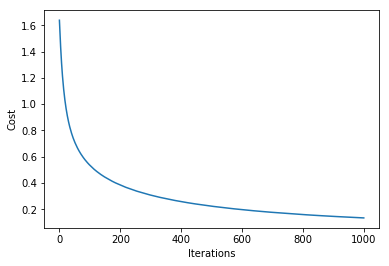

In [200]:
plt.plot(range(len(costs)), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### 6.Model Execution

##### Note :  Before running this part ensure that the unseen data being used has been processed through the pre-processing phase wherein its dimensionality will be reduced.

In [201]:
test_data.head()

,0,0,1,2,3,4,5,6,7,8,...,5990,5991,5992,5993,5994,5995,5996,5997,5998,5999
20104,dalmax.games.turnBasedGames.connect4,0.058408,-0.086312,-0.017966,-0.029914,-0.038966,-0.065679,-0.038958,0.017048,-0.049100,...,0.002854,-0.009623,0.007389,-0.002249,-0.000379,0.002123,0.001447,0.003505,-0.001945,0.000268
20105,com.holfeld.japaneseplusfree,0.057007,-0.087175,-0.010635,-0.019881,-0.013203,-0.018286,-0.008034,-0.014003,0.039149,...,-0.009131,-0.004556,0.004803,-0.006369,0.002166,0.002527,-0.001443,0.005494,0.005949,-0.004347
20106,com.mobileApp.controller,0.233678,0.009336,-0.000122,0.034950,-0.062975,0.098312,-0.006224,-0.004706,0.013357,...,0.001734,0.004621,0.004127,0.000559,-0.000859,-0.003604,-0.002062,-0.000408,0.001912,-0.001012
20107,com.aarontennyson.calorietracker,0.052331,-0.073060,-0.016667,-0.026372,-0.005165,-0.026041,-0.013224,-0.004844,0.007517,...,0.010772,0.002139,0.005273,0.002945,-0.006192,-0.000632,-0.006245,-0.004676,0.004074,0.002726
20108,com.totaldevel.android.todocitas.ads,0.067605,-0.113293,-0.007841,0.008298,-0.086958,0.076894,-0.006913,0.003860,-0.008090,...,-0.004852,0.003321,-0.003494,0.000028,-0.004103,-0.000485,-0.002378,0.004441,0.002159,0.008925


In [202]:
X_test = test_data.iloc[:,1:]

In [203]:
X_test = np.array(X_test)

In [204]:
predictions = predict(X_test,W,bias.T)

In [205]:
label_dict = Y_labels.set_index('levels').to_dict()['labels']

In [207]:
test_data_preds = to_labels(predictions)

In [209]:
output = pd.concat([total_data.iloc[trn_data.shape[0]:,:].reset_index(), test_data_preds],axis=1)

In [210]:
output.to_csv('predition_output.csv', sep='\t')